# Wahrscheinlichkeitsverteilungen Übersicht

## Inhaltsverzeichnis

- **diskrete Verteilungen:**
    - [Diskrete Gleichverteilung](#diskrete-gleichverteilung)
    - [Bernoulliverteilung](#bernoulliverteilung)
    - [Binomialverteilung](#binomialverteilung)
    - [Poissonverteilung](#poissonverteilung)
    - [Negative Binomialverteilung](#negative-binomialverteilung)
    - [Geometrische Verteilung](#geometrische-verteilung)
    - [Hypergeometrische Verteilung](#hypergeometrische-verteilung)
- **kontinuierliche Verteilungen:**
    - [Kontinuierliche Gleichverteilung](#kontinuierliche-gleichverteilung)
    - [Gammaverteilung](#gammaverteilung)
    - [Betaverteilung](#betaverteilung)
    - [Exponentialverteilung](#exponentialverteilung)
    - [Normalverteilung](#normalverteilung)



## Diskrete Verteilungen 

### Diskrete Gleichverteilung <a class="anchor" id="diskrete-gleichverteilung"></a>
**Zähldichte (probabillity mass function):**

*allgemein:* $ P(X^{-1}(x))=P(X=x)=f(x)$

$f(x) = \left\{
\begin{array}{ll}
\frac{1}{n}&, \ \textrm{für}\ 0 < x \le n \\
0 &, \ \textrm{sonst} \\
\end{array}
\right.\\ \textrm{mit} \ n = b - a \ , \ \textrm{für} \ b > a$
<br><br>
**Verteilungsfunktion (cumulative distribution function):**

$P(X \le x)=F_{X}(x)= \sum_{i = 1}^{x}\frac{i}{n} $
<br><br>
**Erwartungswert:**

$\mathbb{E}(X) = \frac{1}{n}\sum_{i=1}^{n} x_{i}$
<br><br>
**Varianz:**

*allgemein:* $\mathbb{V}(X) = \mathbb{E}(X^{2})-(\mathbb{E}(X))^{2}$

$\mathbb{V}(X)= \frac{1}{n}\sum_{i=1}^{n}(x_{i} - (\mathbb{E}(X) )^2$
<br><br>
**Standardabweichung:**

*allgemein:* $\sigma = \sqrt{\mathbb{V}(X)}$

$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_{i} - \mathbb{E}(X)^2}$

In [143]:
from scipy.stats import randint
import numpy as np

#Parameter zum anpassen
a = 1
b = 7

rand = randint(a, b)
x = np.arange(0, b, 0.01)
pmf = np.array(rand.pmf(x))
cdf = np.array(rand.cdf(x))

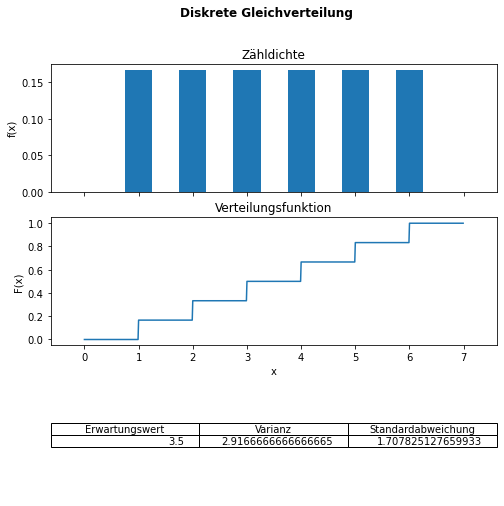

In [144]:
from matplotlib import pyplot as plt

fig= plt.figure(figsize=(8,8))
fig.suptitle('Diskrete Gleichverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Zähldichte")
ax1.bar(x, pmf, width=0.5)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(x, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[rand.expect(),
      rand.var(),
      rand.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Bernoulliverteilung <a class="anchor" id="bernoulliverteilung"></a>
Durchführung eines Bernoulli-Experiments, welches die zwei Ergebnisse Misserfolg (0) bzw. Erfolg (1) besitzt
<br><br>
**Zähldichte:**

$f (x) = \left\{
\begin{array}{ll}
p^{x}\cdot(1-p)^{(1-x)}&, \ x = 0, \ 1 \\
0 &, \ \textrm{sonst} \\
\end{array}
\right. $
<br><br>
**Verteilungsfunktion:**

$F_{X}(x) = \left\{
\begin{array}{ll}
0 &, \ x < 0 \\
1-p &, \ 0 \le x \le 1 \\
1 &, \ x \ge 1 \\
\end{array}
\right. $
<br><br>
**Erwartungswert:**

$\mathbb{E}(X) = p$
<br><br>
**Varianz:**

$\mathbb{V}(X)=p\cdot(1-p)$
<br><br>
**Standardabweichung:**

$\sigma = \sqrt{p\cdot(1-p)}$

In [145]:
from scipy.stats import bernoulli

p = 0.3
n = 1

b  = bernoulli(p)
x = np.arange(0, n+1, 0.01)
pmf = np.array(b.pmf(x))
cdf = np.array(b.cdf(x))

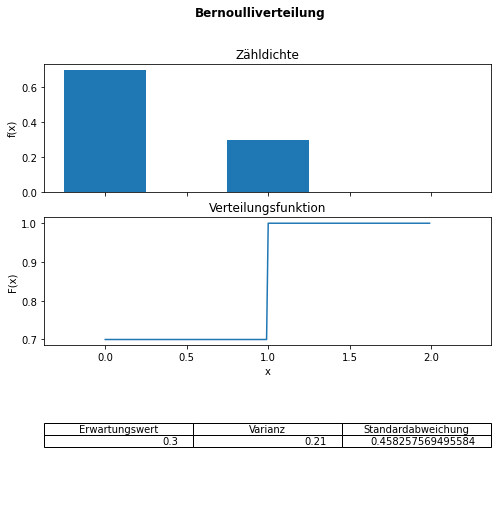

In [146]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Bernoulliverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Zähldichte")
ax1.bar(x, pmf, width=0.5)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(x, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[b.expect(),
      b.var(),
      b.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Binomialverteilung <a class="anchor" id="binomialverteilung"></a>
Durchführung von *n-mal* unabhängigen *Bernoulli-Experimenten*
<br><br>
**Zähldichte:**

$f_{p, \ n}(k)= \left\{
\begin{array}{ll}
\binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}  &, \  0 \le k \le n\\
0 &, \ \textrm{sonst} \\
\end{array}
\right. $
<br><br>
**Verteilungsfunktion:**

$F_{X}(x)= \sum_{k=0}^{|x|} \binom{n}{k} \cdot p^{k} \cdot (1-p)^{n-k}$
<br><br>
**Erwartungswert:**

$\mathbb{E}(X) = n \cdot p$
<br><br>
**Varianz:**

$\mathbb{V}(X) = n \cdot p \cdot (1-p)$
<br><br>
**Standardabweichung:**

$\sigma = \frac{\sqrt{n}}{2}$

In [147]:
from scipy.stats import binom

n = 10
p = 0.5

k = np.arange(0, n+1, 0.01)
bino = binom(n, p)
pmf = np.array(bino.pmf(k))
cdf = np.array(bino.cdf(k))

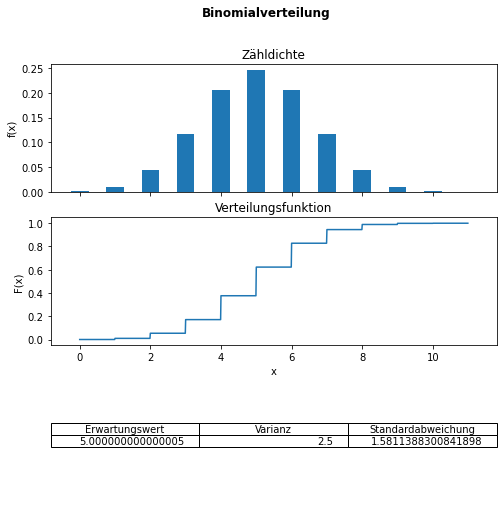

In [148]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Binomialverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Zähldichte")
ax1.bar(k, pmf, width=0.5)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(k, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[bino.expect(),
      bino.var(),
      bino.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Poissonverteilung <a class="anchor" id="poissonverteilung"></a>
Grenzverteilung $(n \rightarrow \infty)$ der Bernoulliverteilung
<br><br>
**Zähldichte:**

$f_{\lambda}(k)=\frac{\lambda^{k}}{k!}e^{-\lambda}$ mit $\lambda = n \cdot p_{n}$
<br><br>
**Verteilungsfunktion:**

$F_{\lambda}(n)=\sum_{k=0}^{n}f_{\lambda}(k) = p_{n}$
<br><br>
**Erwartungswert:**

$\mathbb{E}(X)=\lambda$
<br><br>
**Varianz:**

$\mathbb{V}(X)=\lambda$
<br><br>
**Standartabweichung:**

$\sigma = \sqrt{\lambda}$

In [149]:
from scipy.stats import poisson

lam = 5
n = 12

k = np.arange(0, n+1, 0.01)
poi = poisson(lam)
pmf = np.array(poi.pmf(k))
cdf = np.array(poi.cdf(k))

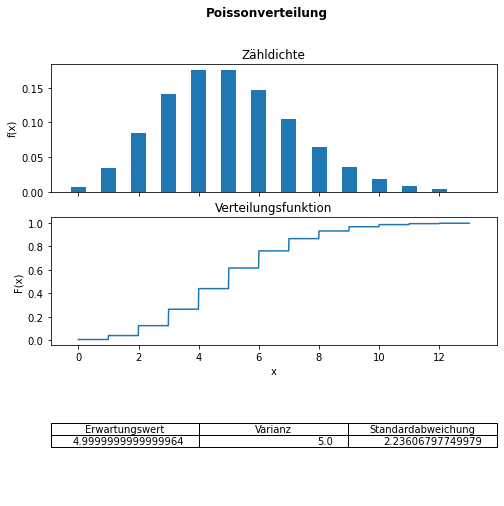

In [150]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Poissonverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Zähldichte")
ax1.bar(k, pmf, width=0.5)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(k, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[poi.expect(),
      poi.var(),
      poi.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Negative Binomialverteilung <a class="anchor" id="negative-binomialverteilung"></a>
Gibt die Wartezeit bis zum *r-ten* Erfolg im *Binomialmodel*(Wiederholung von unabhängigen *Bernouli-Experimenten*) an
<br><br>
**Zähldichte:**

$f_{r,\ p}(k) = \binom{r+k-1}{k} \cdot p^{r} \cdot (1-p)^{k}$
<br><br>
**Verteilungsfunktion:**

$F_{r, \ p}(k) = \sum_{k = 0}^{\infty}\binom{-r}{k} \cdot p^{r} \cdot (1-p)^{k}$
<br><br>
**Erwartungswert:**

$\mathbb{E}(X)=\frac{r \ \cdot \ (1-p)}{p}$
<br><br>
**Varianz:**

$\mathbb{V}(X)=\frac{r \ \cdot \ (1-p)}{p^{2}}$
<br><br>
**Standardabweichung:**

$\sigma=\frac{\sqrt{r \ \cdot \ (1-p)}}{p}$

In [151]:
from  scipy.stats import nbinom

n = 5
r = 0.4
p = 0.4

k = np.arange(0, n+1, 0.01)
nbino = nbinom(r, p)
pmf = np.array(nbino.pmf(k))
cdf = np.array(nbino.cdf(k))

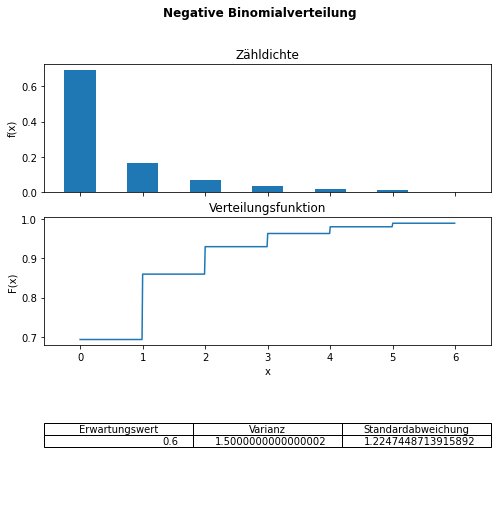

In [152]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Negative Binomialverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Zähldichte")
ax1.bar(k, pmf, width=0.5)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(k, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[nbino.expect(),
      nbino.var(),
      nbino.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Geometrische Verteilung <a class="anchor" id="geometrische-verteilung"></a>
Spezialfall der *negativen Binomialverteilung*: Gibt Wartezeit bis zum *ersten* Erfolg im *Binomialmodel* an
<br><br>
**Zähldichte:**

$f_{1,\ p}(k)=f_{p}(k)= p \cdot (1-p)^{k}$
<br><br>
**Verteilungsfunktion:**

$F_{p}(k) = \sum_{i=1}^{k}p \cdot (1-p)^{i-1} = 1-(1-p)^{k}$
<br><br>
**Erwartungswert:**

$\mathbb{E}(X)= \frac{1}{p}$
<br><br>
**Varianz:**

$\mathbb{V}(X) = \frac{1-p}{p^{2}}$
<br><br>
**Standardabweichung:**

$\sigma = \frac{\sqrt{1-p}}{p}$

In [153]:
from scipy.stats import geom

p = 0.5
n = 6

k = np.arange(0, n+1, 0.01)
geo = geom(p)
pmf = np.array(geo.pmf(k))
cdf = np.array(geo.cdf(k))

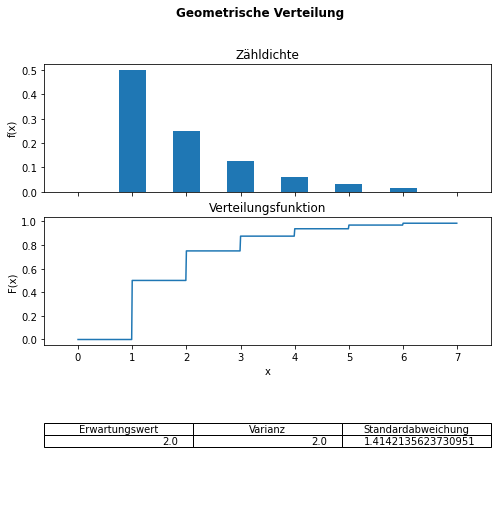

In [154]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Geometrische Verteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Zähldichte")
ax1.bar(k, pmf, width=0.5)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(k, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[geo.expect(),
      geo.var(),
      geo.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Hypergeometrische Verteilung <a class="anchor" id="hypergeometrische-verteilung"></a>
Durchführung einer Stichprobe von *n* Elementen, durch ziehen ohne Zurücklegen gibt Auskunft über bestimmte Anzahl *k* von gezogenen Elementen
<br><br>
**Zähldichte:**

$f_{M, n, N}(k) = \frac{\binom{n}{k} \binom{M-N}{N-k}}{\binom{M}{N}}$
<br><br>
**Verteilungsfunktion:**

$F_{M, n, M}(k) = \sum_{i = 0}^{k} \frac{\binom{n}{i} \binom{M-N}{N-i}}{\binom{M}{N}}$
<br><br>
**Erwartungswert:**

$\mathbb{E}(X) = n \cdot \frac{N}{M}$
<br><br>
**Varianz:**

$\mathbb{V}(X) = n \cdot \frac{N}{M}\cdot \frac{(M-N)}{M}\cdot\frac{M-n}{M-1}$

In [155]:
from scipy.stats import hypergeom

[M, n, N] = [20, 7, 12]

hypergeo = hypergeom(M, n, N)
k = np.arange(0, n+1, 0.01)
pmf = np.array(hypergeo.pmf(k))
cdf = np.array(hypergeo.cdf(k))

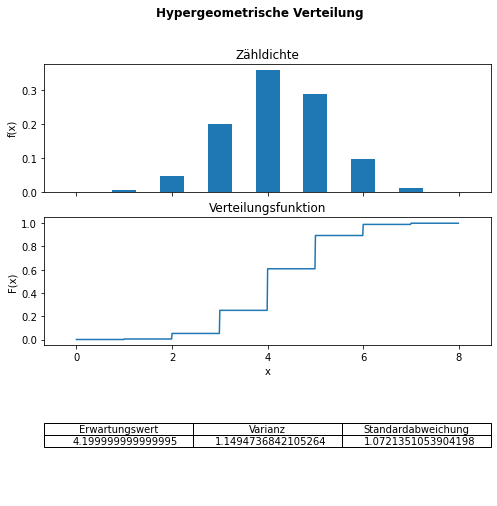

In [156]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Hypergeometrische Verteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Zähldichte")
ax1.bar(k, pmf, width=0.5)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(k, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[hypergeo.expect(),
      hypergeo.var(),
      hypergeo.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

## Kontinuierliche Verteilungen

### Kontinuierliche Gleichverteilung <a class="anchor" id="kontinuierliche-gleichverteilung"></a>
**Dichtefunktion:**

$f(x) = \left\{
\begin{array}{ll}
\frac{1}{b-a} &, \ für \ a \le x \le b\\
0  &, \ \textrm{sonst}\\
\end{array}
\right.$
<br><br>
**Verteilungsfunktion:**

$F(x) = \left\{
\begin{array}{ll}
0  &, \ \textrm{für} \ x \le a\\
\frac{x-a}{b-a} &, \ für \ a < x < b\\
1  &, \ \textrm{für} \ x \ge b\\
\end{array}
\right.$
<br><br>
**Erwartungswert:**

$\mathbb{E}(X) = \int_{-\infty}^{\infty}x \cdot f(x) = \frac{a+b}{2}$
<br><br>
**Varianz:**

$\mathbb{V}(X)=\frac{1}{12}(b-a)^2$
<br><br>
**Standardabweichung:**

$\sigma = \sqrt{\frac{1}{12}(b-a)^2} = \frac{b-a}{2\sqrt{3}}$

In [157]:
from scipy.stats import uniform

a = 1
b = 8

uni = uniform(a, scale= b-a)
x = np.arange(0, b+1, 0.01)
pdf = np.array(uni.pdf(x))
cdf = uni.cdf(x)

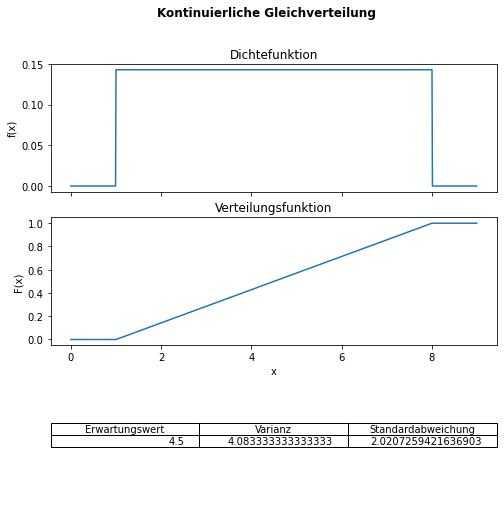

In [158]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Kontinuierliche Gleichverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Dichtefunktion")
ax1.plot(x, pdf)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(x, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[uni.expect(),
      uni.var(),
      uni.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Gammaverteilung <a class="anchor" id="gammaverteilung"></a>
Gibt die Wartezeit auf den *r-ten* Schadensfall an
<br><br>
**Dichtefunktion:**

$f_{\alpha, r}(x) = \left\{
\begin{array}{ll}
\frac{\alpha^{r}}{\Gamma(r)}x^{r-1} e^{-\alpha \cdot r}  &, \ für \ x > 0\\
0 &, \ für \ x \le 0\\
\end{array}
\right. \\ \textrm{mit} \ \Gamma(r) = (r-1)!$
<br><br>
**Verteilungsfunktion:**

$F_{\alpha, r}(x) =\frac{\alpha^{r}}{\Gamma(r)}\int_{0}^{x}u^{r-1} \cdot e^{-\alpha \cdot u} du$
<br><br>
**Erwartungswert:**

$\mathbb{E}(X) = \frac{r}{\alpha}$
<br><br>
**Varianz:**

$\mathbb{V}(X)) = \frac{r}{\alpha^{2}}$
<br><br>
**Standardabweichung:**

$\sigma =\frac{\sqrt{r}}{\alpha}$ 

In [159]:
from scipy.stats import gamma

[n, a, r ] = [6, 1, 2]

x = np.arange(0, n+1, 0.01)
gam = gamma(r, 0, a)
pdf = np.array(gam.pdf(x))
cdf = gam.cdf(x)

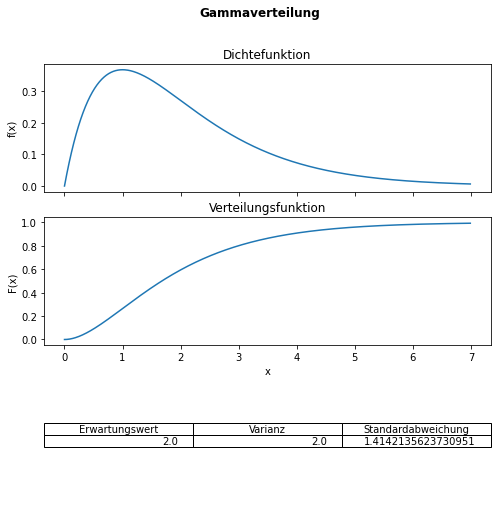

In [160]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Gammaverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Dichtefunktion")
ax1.plot(x, pdf)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(x, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[gam.expect(),
      gam.var(),
      gam.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Betaverteilung <a class="anchor" id="betaverteilung"></a>
**Dichtefunktion:**

$f_{r, n}(x) = \frac{1}{B(r,n)}\cdot x^{r-1}\cdot (1-x)^{n-1} \ \textrm{mit} \ B(r,n) = \frac{\Gamma(r)\cdot \Gamma(n)}{\Gamma(r+n)}$
<br><br>
**Verteilungsfunktion:**

$F_{r,n}(x) = \left\{
\begin{array}{ll}
0  &, \ für \ x \le 0\\
\frac{1}{B(r, n)}\int_{0}^{x} u^{r-1} \cdot (1-u)^{n-1}du &, \ für \ 0 < x \le 1\\
1  &, \ für \ x > 1\\
\end{array}
\right.$
<br><br>
**Erwartungswert:**

$\mathbb{E}(X)=\frac{r}{r+n}$
<br><br>
**Varianz:**

$\mathbb{V}(X) = \frac{r\cdot n}{(r+n+1)\cdot(r+n)^2}$
<br><br>
**Standardabweichung:**

$\sigma = \sqrt{\frac{r\cdot n}{(r+n+1)\cdot(r+n)^2}}$

In [161]:
from scipy.stats import beta

[r, n, N] = [2, 10, 1]

x = np.arange(0, N+1, 0.01)
bet = beta(r, n)
pdf = np.array(bet.pdf(x))
cdf = np.array(bet.cdf(x))

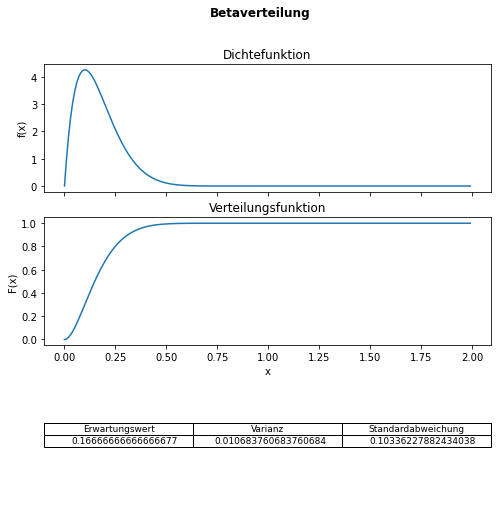

In [162]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Betaverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Dichtefunktion")
ax1.plot(x, pdf)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(x, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[bet.expect(),
      bet.var(),
      bet.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Exponentialverteilung <a class="anchor" id="exponentialverteilung"></a>
Spezialfall der *Gammaverteilung*: Gibt die Wartezeit bis zum *ersten* Schadensfall an
<br><br>
**Dichtefunktion (probability density function):**

$f_{\alpha, 1}(x)= f_{\lambda}(x)= \left\{
\begin{array}{ll}
\lambda \cdot e^{- \lambda x} &, \  x \ge 0\\
0 &, \ x \ < \ 0\\
\end{array}
\right. $
<br><br>
**Verteilungsfunktion:**

$F_{\lambda}(x) = \int_{0}^{x}f_{\lambda}(t)dt = \left\{
\begin{array}{ll}
1- e^{- \lambda x} &, \  x \ge 0\\
0 &, \ x  \ < \ 0\\
\end{array}
\right. $
<br><br>
**Erwartungswert:**

$\mathbb{E}(X) = \frac{1}{\lambda}$
<br><br>
**Varianz:**

$\mathbb{V}(X) = \frac{1}{\lambda^{2}}$
<br><br>
**Standardabweichung:**

$\sigma = \frac{1}{\lambda}$

In [163]:
from scipy.stats import expon

n = 6
lamb = 1

exp = expon(scale=1/lamb)

x = np.arange(0, n, 0.01)
pdf = np.array(exp.pdf(x))
cdf = exp.cdf(x)

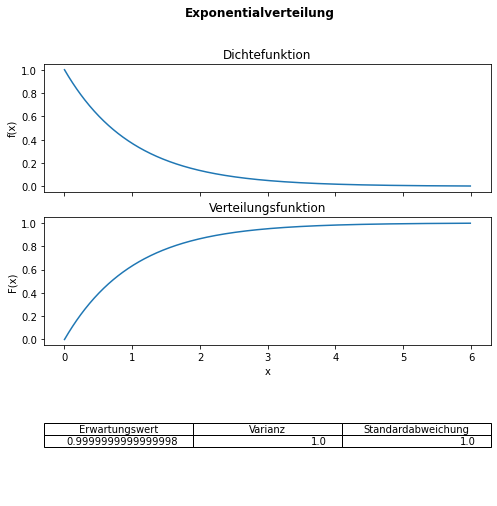

In [164]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Exponentialverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Dichtefunktion")
ax1.plot(x, pdf)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(x, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[exp.expect(),
      exp.var(),
      exp.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()

### Normalverteilung <a class="anchor" id="normalverteilung"></a>
**Dichtefunktion:**

$f_{ \mu,\sigma^{2}}(x)=\frac{1}{\sqrt{2 \pi \cdot \sigma^{2}}} \cdot e^{- \frac{(x - \mu)^{2}}{2 \cdot \sigma^{2}}}$
mit *Erwartungswert:* $-\infty <\mu < \infty$, *Varianz:* $ \sigma^{2} > 0$ und *x:* $-\infty <x < \infty$
<br><br>
**Verteilungsfunktion:**

$F_{\mu,\sigma^{2}}(x)=\int_{-\infty}^{x}f_{\mu,\sigma^{2}}(t)dt$

In [165]:
from scipy.stats import norm

[mu, var, n] = [4, 1, 8]

x = np.arange(0, n+1, 0.01)
nor = norm(mu, var)
pdf = np.array(nor.pdf(x))
cdf = np.array(nor.cdf(x))

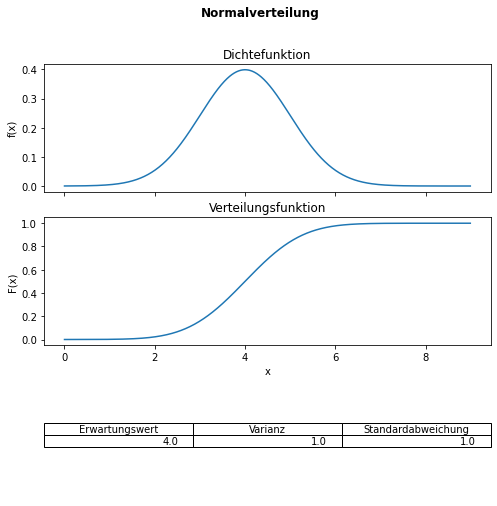

In [166]:
fig= plt.figure(figsize=(8,8))
fig.suptitle('Normalverteilung', weight='bold')
ax1 = plt.subplot(311)
ax1.set_title("Dichtefunktion")
ax1.plot(x, pdf)
ax1.set_ylabel('f(x)')
ax2 = plt.subplot(312)
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.set_title("Verteilungsfunktion")
ax2.plot(x, cdf)

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xticklabels([])

data= [[nor.expect(),
      nor.var(),
      nor.std()]]
column_labels=["Erwartungswert", "Varianz", "Standardabweichung"]
ax3 = plt.subplot(313)
ax3.axis('tight')
ax3.axis('off')
ax3.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()